# Part 2: Spectral Clustering

### Helper Functions

In [16]:
def form_neighbours(data, nearest):
    N = data.shape[0]
    neighbours = np.zeros([N,N])
    distances = np.zeros([N,N])
    for i in range(N):
        dist = np.sum(np.abs(data-data[i,:])**2,axis=-1)**(1./2)
        distances[i,:] = dist
        current_neighbours = np.argsort(dist)[1:1+nearest]
        for j in current_neighbours:
            neighbours[i,j] = 1
    neighbours = symmetrize(neighbours)
    return neighbours, distances


def form_degrees(weights):
    N = weights.shape[0]
    degrees = np.eye(N)
    for i in range(N):
        degrees[i,i] = np.sum(weights[i,:])
    return degrees


def spectral_cluster(eigvectors):
    N = eigvectors.shape[0]
    k = eigvectors.shape[1]
    groups = kmeans(eigvectors,k)
    return groups


def symmetrize(A):
    temp = A + A.T
    temp[temp > 0] = 1
    return temp


def kmeans(D, k):
    N = D.shape[0]
    dim = D.shape[1]
    ave = np.mean(D, axis=0)
    std = np.std(D, axis=0)
    centers = np.random.randn(k,dim)  * 0.5 * std + ave
    groups = np.random.randint(0,k,[N,1])
    for j in range(10):
        for i in range(N):
            centers - D[i,:]
            dist = np.sum(np.abs(centers-D[i,:])**2,axis=1)**(1./2)
            groups[i] = np.argsort(dist)[0]
        for i in range(k):
            centers[i,:] = np.mean(D[np.nonzero(groups == i)[0],:],axis=0)
    return groups, centers

### Plotter Functions

In [17]:
colors = ['#e47993','#7bb227','#4e0f91','#98332e','#5fabb2','#458186']

def plot_data(data, ax):
    ax.plot(data[:,0],data[:,1],'.')

    
def plot_edges(data, neighbours, ax):
    edges = np.nonzero(neighbours == 1)
    for i in range(len(edges[0])):
        x1 = data[edges[0][i],:]
        x2 = data[edges[1][i],:]
        current = np.vstack([x1,x2])
        ax.plot(current[:,0],current[:,1],'-k',lw=0.5)

        
def plot_groups(data, groups, ax):
    N = data.shape[0]
    for i in range(N):
        ax.plot(data[i,0],data[i,1],'.',color=colors[groups[i,0]],lw=2)

        
def plot_centers(centers, ax):
    N = centers.shape[0]
    for i in range(N):
        ax.plot(centers[i,0],centers[i,1],'o',color=colors[i])

### Main Function

In [43]:
def project_part2(file_name, nearest, k, sigma=3):
    ## 1. Read Data
    data = np.genfromtxt(file_name, delimiter=',',dtype=float)
    N = data.shape[0]
    fig1 = plt.figure(figsize=(16.0, 12.0))
    ax1 = fig1.add_subplot(221)
    plot_data(data, ax1)
    ax1.set_title('Just Data')


    ## 2. Find Neighbours and Distances
    #nearest = 5
    neighbours, distances = form_neighbours(data, nearest)
    ax2 = fig1.add_subplot(222)
    plot_data(data, ax2)
    plot_edges(data, neighbours, ax2)
    ax2.set_title('Nearest Neighbours')


    ## 3. Calculate weights, degrees, laplacian
    #sigma = 3.0
    weights = np.exp(-0.5 * (distances / sigma)**2) * neighbours
    degrees = form_degrees(weights)
    laplacian = np.eye(N) - np.dot(weights, np.linalg.inv(degrees))


    ## 4. Find k eigenvectors of laplacian and cluster
    eig_vals, eig_vecs = np.linalg.eig(laplacian)
    index = np.argsort(eig_vals)
    #k = 2
    groups = spectral_cluster(eig_vecs[:,index[:k]])[0]
    ax3 = fig1.add_subplot(223)
    plot_groups(data, groups, ax3)
    ax3.set_title('Spectral Clustering')


    ## 5. k-Means clustering to comparison
    ax4 = fig1.add_subplot(224)
    groups, centers = kmeans(data,k)
    plot_groups(data, groups, ax4)
    plot_centers(centers, ax4)
    ax4.set_title('Standard k-means Clustering')

    ## 6. Print
    plt.show()

### Test 1: 5-NN and 2 Clusters

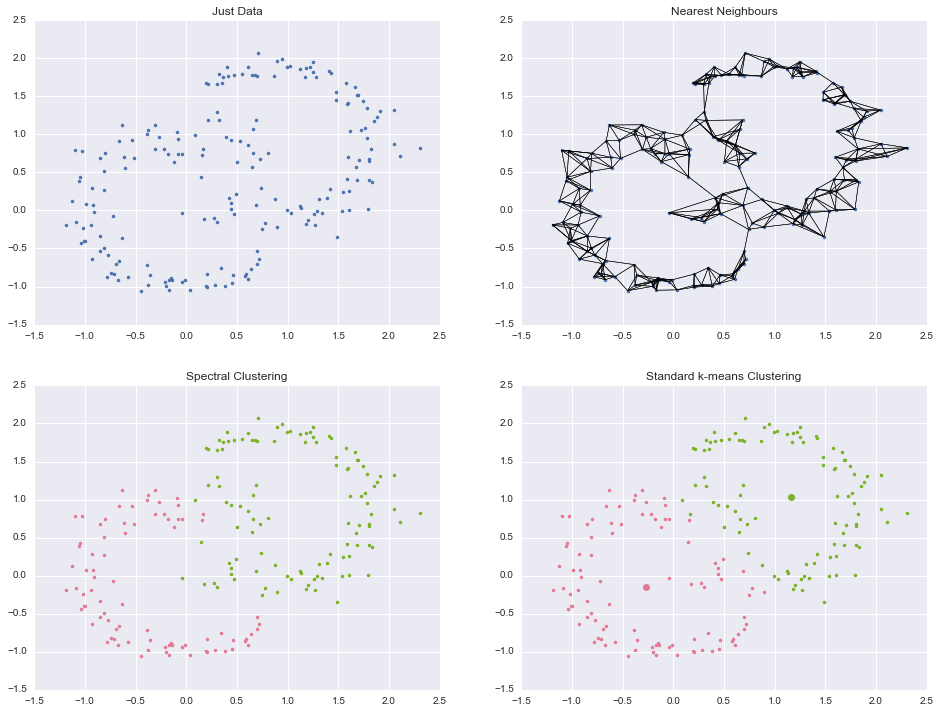

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
np.random.seed(12345)
np.set_printoptions(precision=4,suppress=False)


project_part2('dataset2.csv', 5, 2)

### Test 1: 3-NN and 3 Clusters

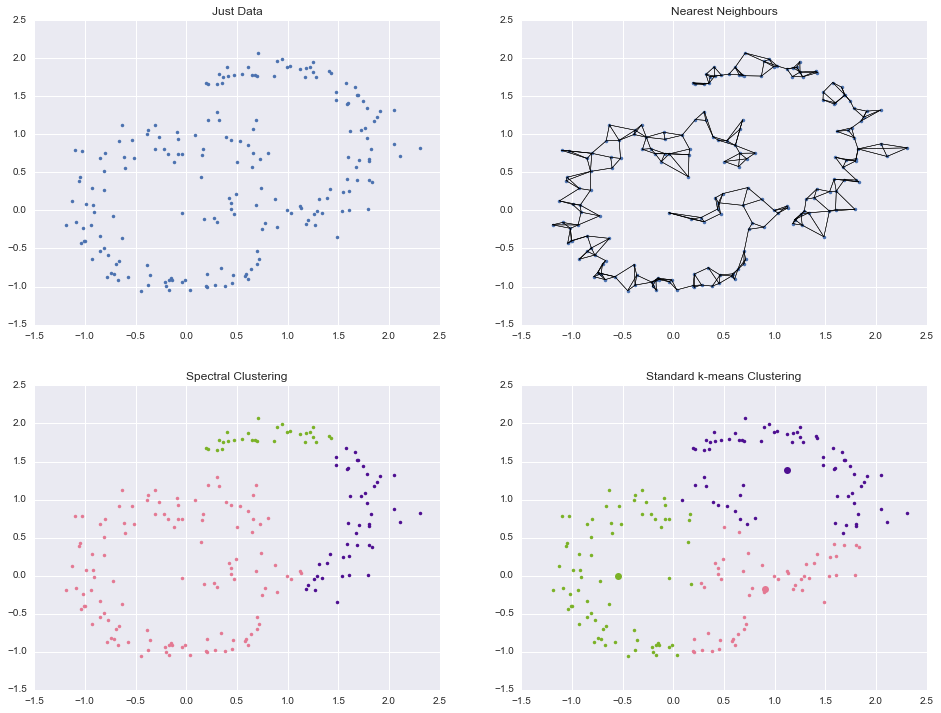

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
np.random.seed(12345)
np.set_printoptions(precision=4,suppress=False)


project_part2('dataset2.csv', 3, 3, sigma=0.5)